# Index

- Import Libraries 
- Import Dataset
- Data Processing
- Data Visualization
- Correlation Matrix
- Feature Scaling
- Initial accuracy 
- Feature Selection
- Models
    - Logistics Regression
    - LDA - 613 and https://www.youtube.com/watch?v=IMfLXEOksGc
    - QDA
    - KNN
    - SVM (Also Check 613 book)
    - Kernel SVM
    - Naive Bayes
    - Decision Tree
    - Random Forest
    - One vs All
    - ANN
    - Gradient Boosting
    - Bootstrap ??
    - Polynomial Regression?? (Also Check 613 book)
    - Ensemble Methods - Bagging, Boosting and Stacking
    - XGBoost, LightGBM, CatBoost
    - Parameter Tuning
        - Ridge 
        - Lasso
        - PCA
        - Partial Least Square

- Notes - 
    - Check what is confounding (613 book student and debt)


## Import Libraries

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msn
from sklearn.svm import SVC
from skompiler import skompile
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix


## Import Dataset

In [27]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [467]:
df = pd.read_csv(r'https://raw.githubusercontent.com/AnshulSGarg/Spotify-Genres-Classification-Model/main/spotify_songs.csv')

In [468]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [469]:
df = df[['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','playlist_genre']]

In [1]:
# Features - 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms'

In [470]:
classification_df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','playlist_genre']]

# Data Processing

In [274]:
print("----------- column data type -----------")
print(classification_df.dtypes)

----------- column data type -----------
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
playlist_genre       object
dtype: object


In [275]:
classification_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms playlist_genre  
0          0.000000    0.0653    0.518  122.036       194754            pop  
1          0.004210    0.3570    0.693   99.972       162600            pop  
2          0.000023    0.1100    0.613  124.008       176616            pop  
3          0.000009    0.2040    0.277  121.956       169093            pop  
4          0.000000    0.0833    0.725  123.976       189052            pop

In [276]:
classification_df.eq(0).sum()

danceability            1
energy                  0
key                  3454
loudness                0
mode                14259
speechiness             1
acousticness            1
instrumentalness    12089
liveness                1
valence                 1
tempo                   1
duration_ms             0
playlist_genre          0
dtype: int64

In [16]:
# There are zeros values for some of the columns but in the context of the columns, zero value makes sense. Therefore no need to exclude them. 

In [277]:
print("----------- QUANTILES -----------")
classification_df.describe().T

----------- QUANTILES -----------


count           mean           std          min  \
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
key               32833.0       5.374471      3.611657     0.000000   
loudness          32833.0      -6.719499      2.988436   -46.448000   
mode              32833.0       0.565711      0.495671     0.000000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  59834.006182  4000.000000   

                          25%            50%           75%         max  
danceability           0.5630       0.672000       0.76100       0.983  
energy                 0.5810       0.721000       0.84000       1.000  
key                    2.0000       6.000000       9.00000      11.000  
loudness              -8.1710      -6.166000      -4.64500       1.275  
mode                   0.0000       1.000000       1.00000       1.000  
speechiness            0.0410       0.062500       0.13200       0.918  
acousticness           0.0151       0.080400       0.25500       0.994  
instrumentalness       0.0000       0.000016       0.00483       0.994  
liveness               0.0927       0.127000       0.24800       0.996  
valence                0.3310       0.512000       0.69300       0.991  
tempo                 99.9600     121.984000     133.91800     239.440  
duration_ms       187819.0000  216000.000000  253585.00000  517810.000

## Visualizations

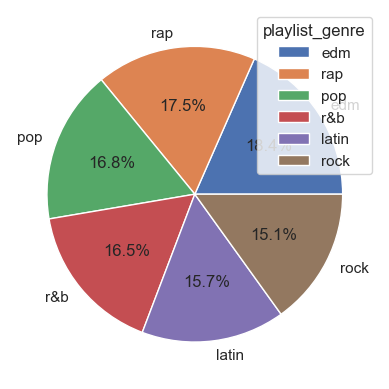

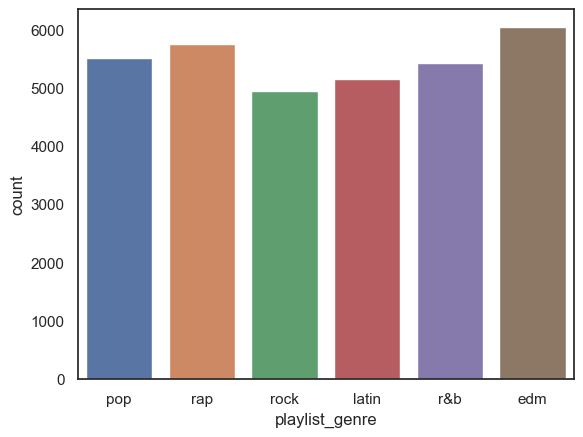

In [278]:
plt.pie(classification_df["playlist_genre"].value_counts().values, labels = classification_df["playlist_genre"].value_counts().index, autopct='%1.1f%%')
plt.legend(title="playlist_genre")
plt.show(block=True)

sns.countplot(classification_df, x="playlist_genre")
plt.show(block=True)


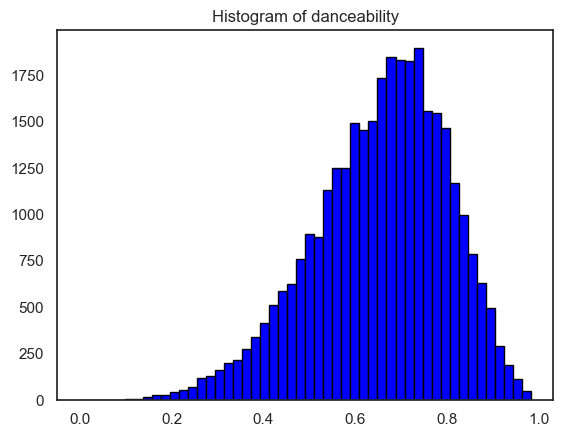

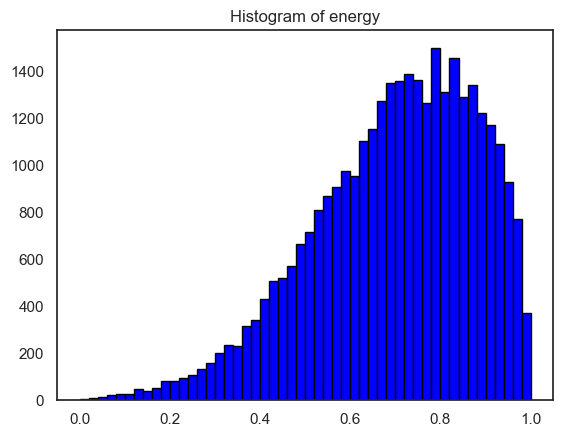

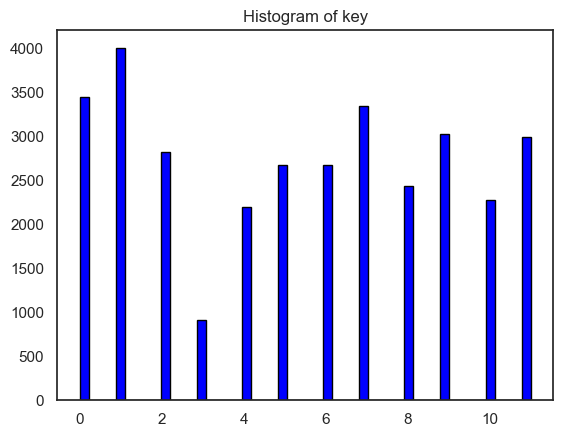

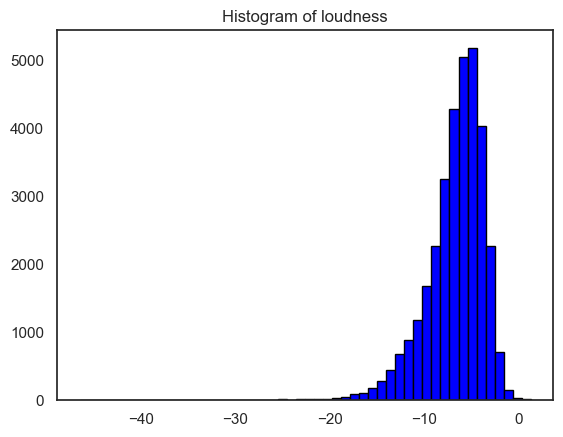

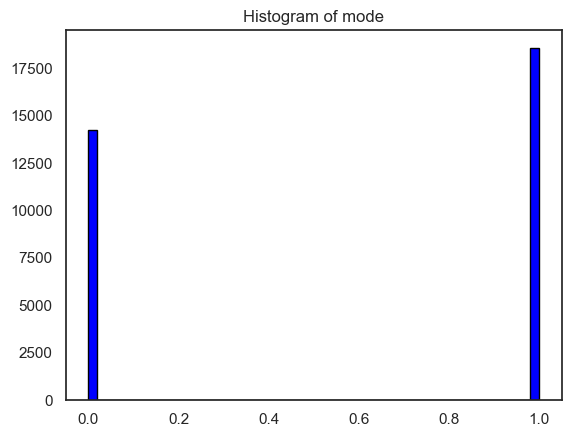

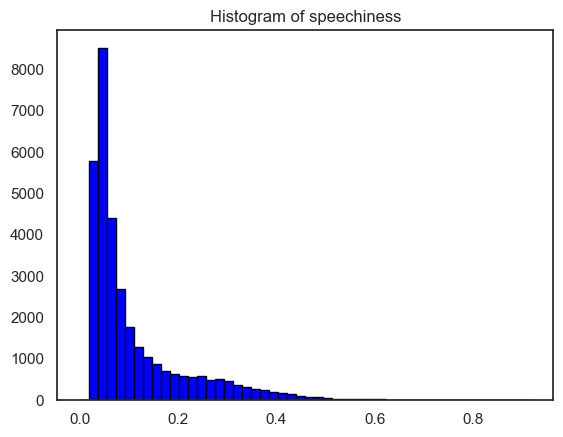

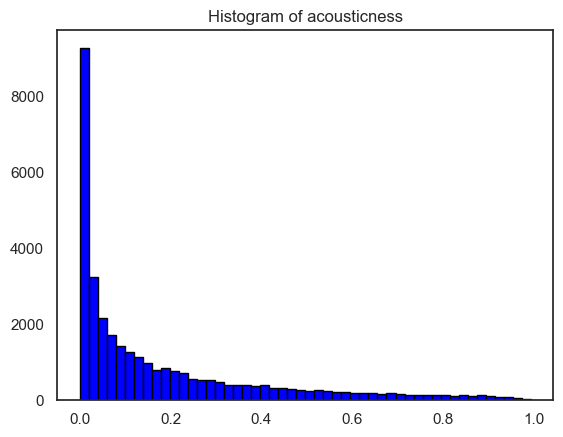

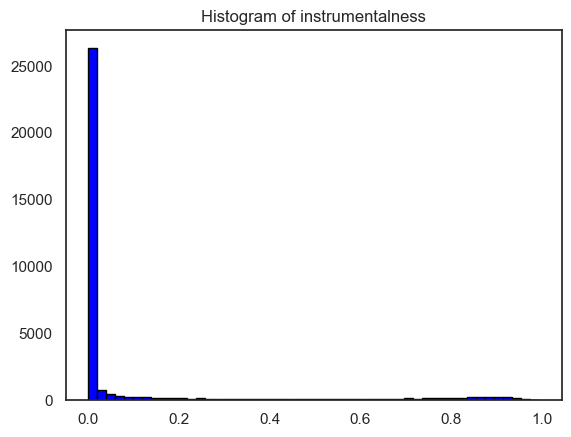

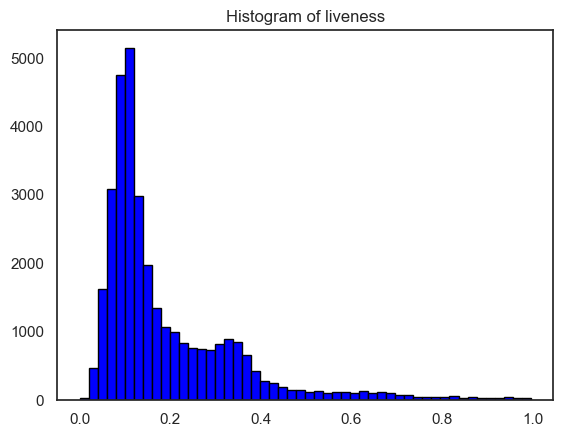

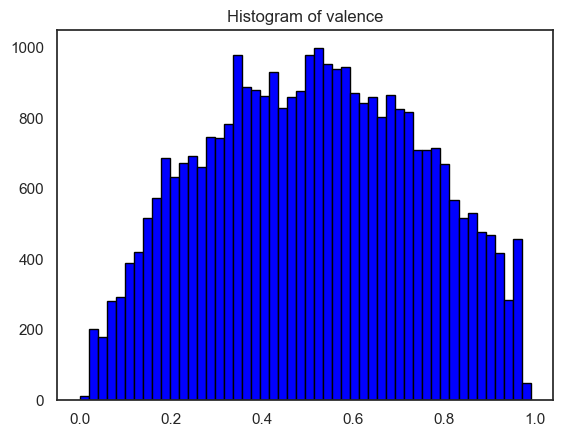

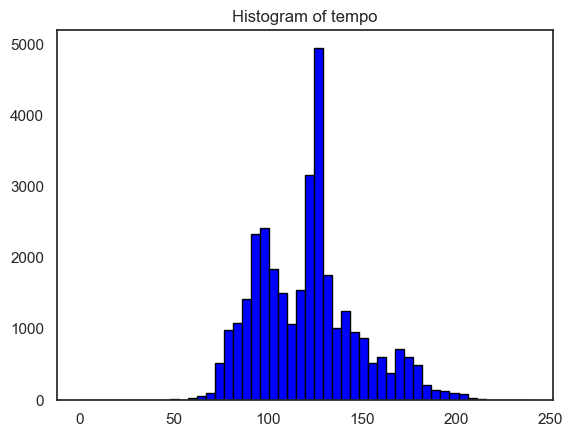

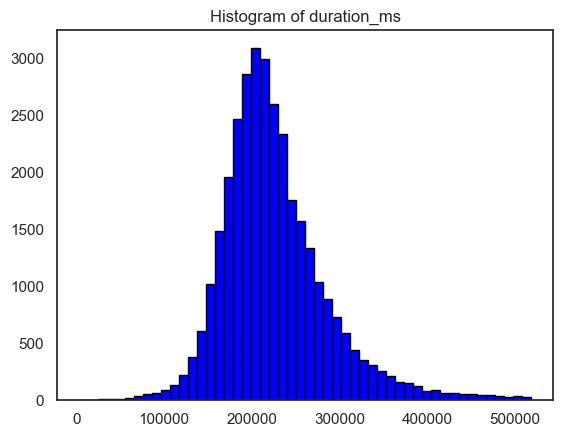

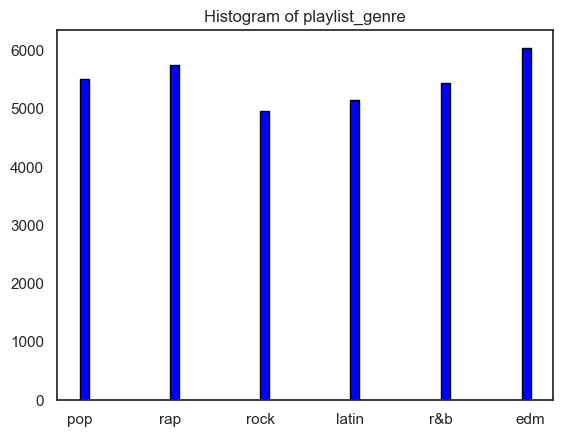

In [158]:
for i in range(0,len(classification_df.columns)):
    data = classification_df.iloc[:, i].values
    plt.hist(data, bins=50, color='blue', edgecolor='black')
    plt.title(f'Histogram of {classification_df.columns[i]}')
    plt.show()

In [441]:
classification_df[['duration_ms']].sort_values(by='duration_ms')

duration_ms
11363         4000
8339         29493
28161        31429
28142        31875
24510        31893
...            ...
20643       516760
12379       516893
11770       517125
12391       517125
21327       517810

[32833 rows x 1 columns]

In [ ]:
# 4000 ms seems to be very small duarion for a song. Excluding it. 

In [471]:
classification_df = classification_df[classification_df['duration_ms']>4000]
classification_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.748   0.916    6    -2.634     1       0.0583      0.102000   
1             0.726   0.815   11    -4.969     1       0.0373      0.072400   
2             0.675   0.931    1    -3.432     0       0.0742      0.079400   
3             0.718   0.930    7    -3.778     1       0.1020      0.028700   
4             0.650   0.833    1    -4.672     1       0.0359      0.080300   
...             ...     ...  ...       ...   ...          ...           ...   
32828         0.428   0.922    2    -1.814     1       0.0936      0.076600   
32829         0.522   0.786    0    -4.462     1       0.0420      0.001710   
32830         0.529   0.821    6    -4.899     0       0.0481      0.108000   
32831         0.626   0.888    2    -3.361     1       0.1090      0.007920   
32832         0.603   0.884    5    -4.571     0       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.0653   0.5180  122.036       194754   
1              0.004210    0.3570   0.6930   99.972       162600   
2              0.000023    0.1100   0.6130  124.008       176616   
3              0.000009    0.2040   0.2770  121.956       169093   
4              0.000000    0.0833   0.7250  123.976       189052   
...                 ...       ...      ...      ...          ...   
32828          0.000000    0.0668   0.2100  128.170       204375   
32829          0.004270    0.3750   0.4000  128.041       353120   
32830          0.000001    0.1500   0.4360  127.989       210112   
32831          0.127000    0.3430   0.3080  128.008       367432   
32832          0.341000    0.7420   0.0894  127.984       337500   

      playlist_genre  
0                pop  
1                pop  
2                pop  
3                pop  
4                pop  
...              ...  
32828            edm  
32829            edm  
32830            edm  
32831            edm  
32832            edm  

[32832 rows x 13 columns]

## Encoding categorical data

In [472]:
# encoding features

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
classification_encoded_df = pd.DataFrame(ct.fit_transform(classification_df), 
                            columns=['mode_1', 'mode_2','danceability', 'energy', 'key', 'loudness', 'speechiness',
                                          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                                          'duration_ms', 'playlist_genre'])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
classification_encoded_df = pd.DataFrame(ct.fit_transform(classification_encoded_df), 
                             columns=[ 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 
                                      'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'key_12',
                                      'mode_1', 'mode_2','danceability', 'energy', 'loudness', 
                                      'speechiness','acousticness', 'instrumentalness', 'liveness', 
                                      'valence', 'tempo','duration_ms', 'playlist_genre'])

classification_encoded_df

key_1 key_2 key_3 key_4 key_5 key_6 key_7 key_8 key_9 key_10  ...  \
0       0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0  ...   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
2       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
4       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
32827   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
32828   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
32829   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0  ...   
32830   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
32831   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0    0.0  ...   

      energy loudness speechiness acousticness instrumentalness liveness  \
0      0.916   -2.634      0.0583        0.102              0.0   0.0653   
1      0.815   -4.969      0.0373       0.0724          0.00421    0.357   
2      0.931   -3.432      0.0742       0.0794         0.000023     0.11   
3       0.93   -3.778       0.102       0.0287         0.000009    0.204   
4      0.833   -4.672      0.0359       0.0803              0.0   0.0833   
...      ...      ...         ...          ...              ...      ...   
32827  0.922   -1.814      0.0936       0.0766              0.0   0.0668   
32828  0.786   -4.462       0.042      0.00171          0.00427    0.375   
32829  0.821   -4.899      0.0481        0.108         0.000001     0.15   
32830  0.888   -3.361       0.109      0.00792            0.127    0.343   
32831  0.884   -4.571      0.0385     0.000133            0.341    0.742   

      valence    tempo duration_ms playlist_genre  
0       0.518  122.036      194754            pop  
1       0.693   99.972      162600            pop  
2       0.613  124.008      176616            pop  
3       0.277  121.956      169093            pop  
4       0.725  123.976      189052            pop  
...       ...      ...         ...            ...  
32827    0.21   128.17      204375            edm  
32828     0.4  128.041      353120            edm  
32829   0.436  127.989      210112            edm  
32830   0.308  128.008      367432            edm  
32831  0.0894  127.984      337500            edm  

[32832 rows x 25 columns]

In [473]:
# encoding predictor
y_encoded = LabelEncoder().fit_transform(classification_encoded_df[['playlist_genre']].values)
y_encoded_df = pd.DataFrame(y_encoded)
y_encoded_df

c:\Users\anshulgarg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
0      2
1      2
2      2
3      2
4      2
...   ..
32827  0
32828  0
32829  0
32830  0
32831  0

[32832 rows x 1 columns]

In [474]:
y_df = classification_encoded_df[['playlist_genre']]
y_df

playlist_genre
0                pop
1                pop
2                pop
3                pop
4                pop
...              ...
32827            edm
32828            edm
32829            edm
32830            edm
32831            edm

[32832 rows x 1 columns]

In [475]:
y_encoding_df = pd.merge(y_df,y_encoded_df, left_index=True, right_index=True)
y_encoding_df.rename(columns={0:'playlist_genre_encoded'},inplace=True)
y_encoding_df = y_encoding_df.drop_duplicates().reset_index().sort_values(by='playlist_genre_encoded')
y_encoding_df = y_encoding_df[['playlist_genre','playlist_genre_encoded']]
y_encoding_df

playlist_genre  playlist_genre_encoded
5            edm                       0
3          latin                       1
0            pop                       2
4            r&b                       3
1            rap                       4
2           rock                       5

## Correlation Analysis

In [447]:
classification_encoded_df.columns

Index(['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'key_12', 'mode_1', 'mode_2',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'playlist_genre'],
      dtype='object')

In [476]:
classification_encoded_df = pd.merge(classification_encoded_df,y_encoding_df, on='playlist_genre', how='left')
classification_encoded_df = classification_encoded_df[['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'key_12', 'mode_1', 'mode_2',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'playlist_genre_encoded']]

In [478]:
# Convert numeric columns to float
numeric_columns = ['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
                    'key_9', 'key_10', 'key_11', 'key_12', 'mode_1', 'mode_2',
                    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

classification_encoded_df[numeric_columns] = classification_encoded_df[numeric_columns].astype(float)

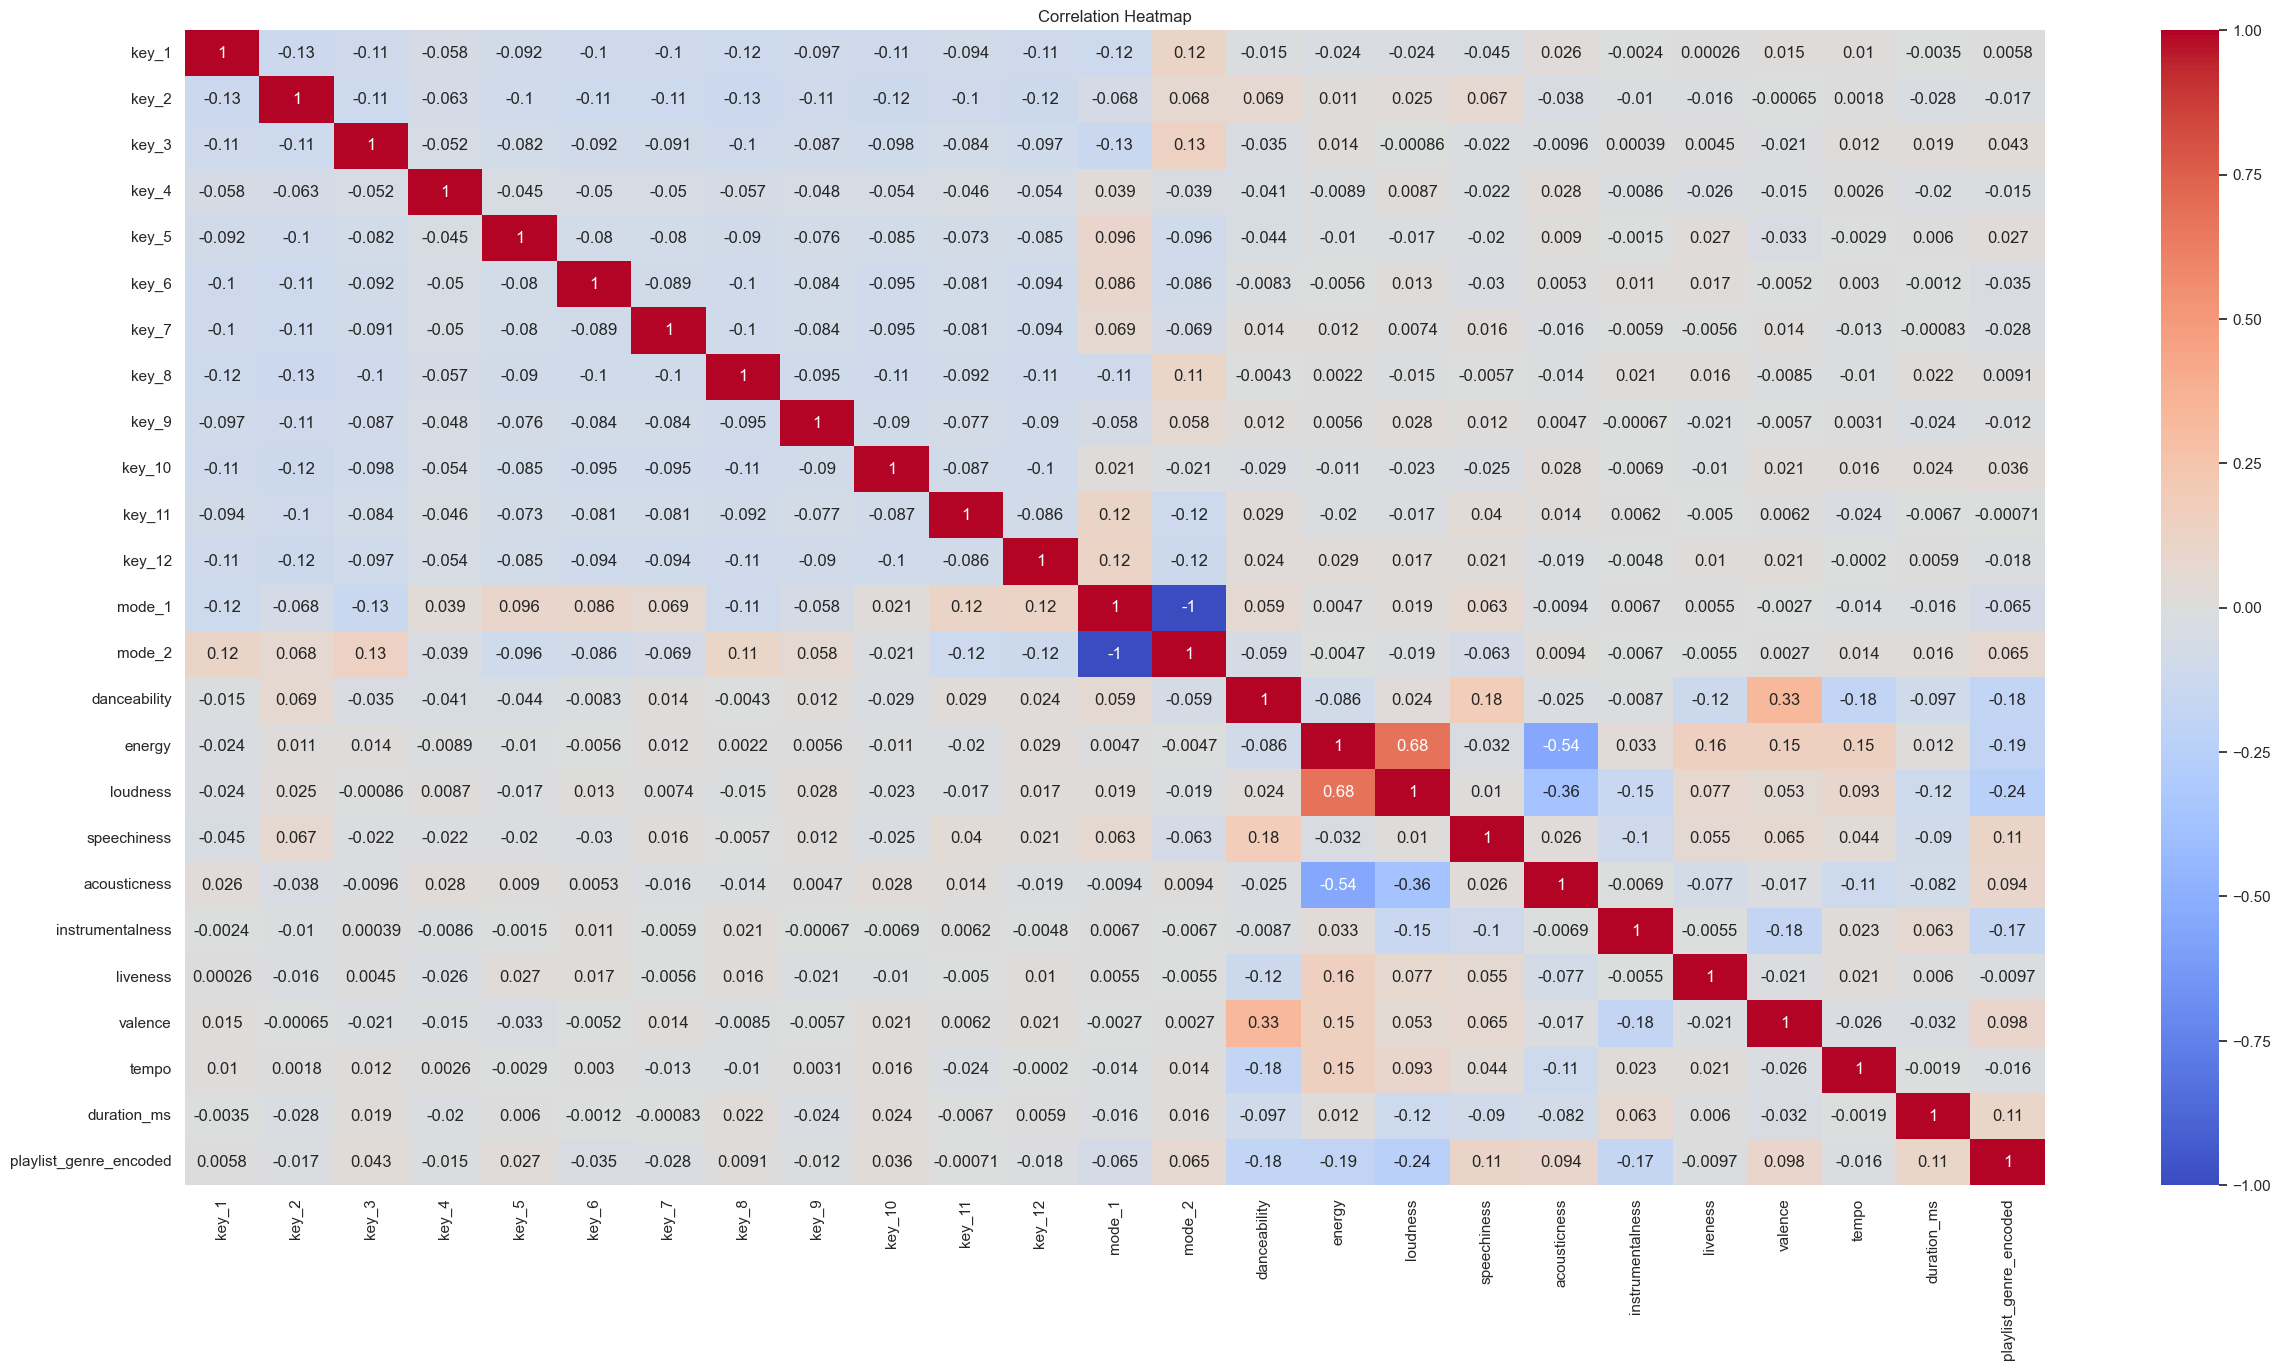

In [571]:
sns.set(style="white")
plt.figure(figsize=(30, 15))
correlation_matrix = np.corrcoef(classification_encoded_df.values, rowvar=False)
axis_labels = classification_encoded_df.columns
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, xticklabels=axis_labels, yticklabels =axis_labels )
plt.title("Correlation Heatmap")
plt.show()

- Notes
    - High Correlation 
      - 0.68 energy vs loudness
      - -.54 energy vs acousticness 



To handle correlation - 
<br>
1. Feature selection
<br>
1a. Try eliminating energy or loudness
<br>
1b. Use combined value like average

## Test Train Split

In [629]:
X = classification_encoded_df.iloc[:, :-1].values # first column is index
y = classification_encoded_df.iloc[:, -1].values

In [630]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [631]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [632]:
import statsmodels.api as sm
model = sm.MNLogit(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.384042
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                24624
Model:                        MNLogit   Df Residuals:                    24499
Method:                           MLE   Df Model:                          120
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.2266
Time:                        20:26:18   Log-Likelihood:                -34081.
converged:                       True   LL-Null:                       -44068.
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2294      0.031      7.396      0.000       0.169       0.290
x1            -0.0074        

# Logistic Regression model

In [655]:
# def Logistics_Regression():
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
Logistics_classifier.fit(X_train, y_train)
y_train_pred = Logistics_classifier.predict(X_train)
## Predicting the Test set results
y_pred = Logistics_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'Logistics train accuracy score is {accuracy_score(y_train, y_train_pred).round(5)}')
print(f'Logsitics test accuracy score is {accuracy_score(y_test, y_pred).round(5)}')

Logistics train accuracy score is 0.46706
Logsitics test accuracy score is 0.47161


optimum value of regularization parameter is {'C': 100}
optimum score is 0.466


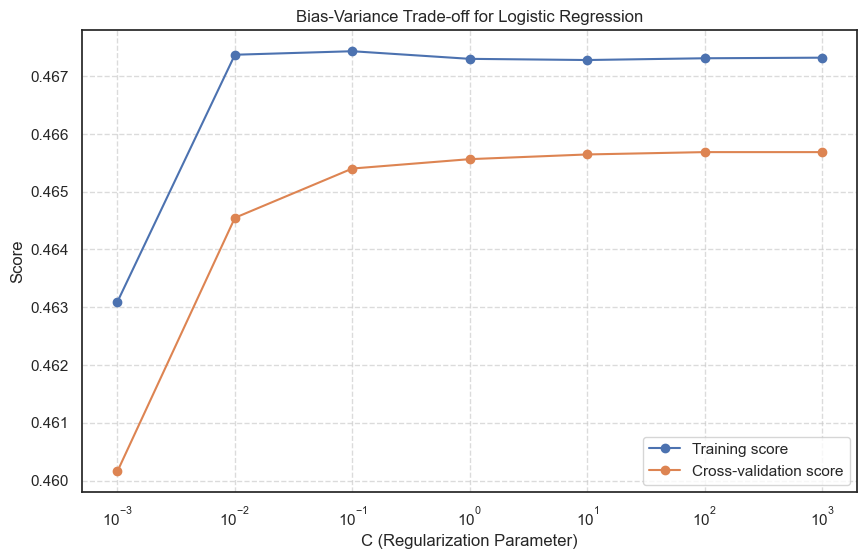

In [670]:
# Define a range of hyperparameter values for C (regularization parameter)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Logistics_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)
print(f'optimum value of regularization parameter is {grid_search.best_params_}')
print(f'optimum score is {(grid_search.best_score_).round(3)}')

# Get the results of the grid search
results = grid_search.cv_results_
param_values = np.array(results['param_C'].data, dtype=float)
train_scores_mean = results['mean_train_score']
test_scores_mean = results['mean_test_score']

# Plot the bias-variance trade-off over hyperparameter values
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores_mean, label='Training score', marker='o')
plt.plot(param_values, test_scores_mean, label='Cross-validation score', marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Bias-Variance Trade-off')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [671]:
# def Logistics_Regression():
from sklearn.linear_model import LogisticRegression
Logistics_classifier = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs')
Logistics_classifier.fit(X_train, y_train)
y_train_pred = Logistics_classifier.predict(X_train)
## Predicting the Test set results
y_pred = Logistics_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'Logistics train accuracy score is {accuracy_score(y_train, y_train_pred).round(5)}')
print(f'Logsitics test accuracy score is {accuracy_score(y_test, y_pred).round(5)}')

Logistics train accuracy score is 0.46711
Logsitics test accuracy score is 0.47173


# LDA Model

In [672]:
# def LDA():
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
LDA_classifier = LinearDiscriminantAnalysis()
LDA_classifier.fit(X_train, y_train)
y_train_pred = LDA_classifier.predict(X_train)
y_pred = LDA_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
# print(cm)
LDA_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'LDA train accuracy score is {accuracy_score(y_train, y_train_pred).round(3)}')
print(f'LDA train accuracy is {(LDA_classifier_accuracy_score).round(3)}')

LDA train accuracy score is 0.461
LDA train accuracy is 0.465


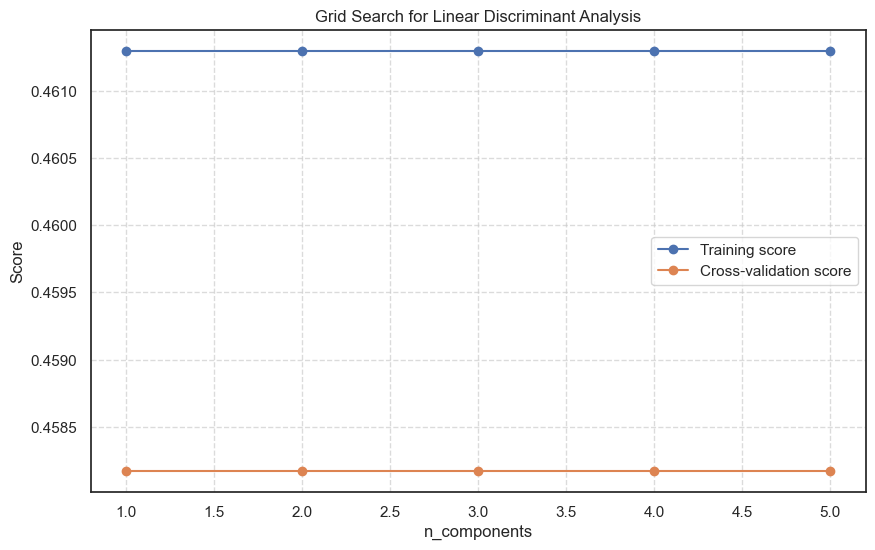

Best parameters: {'n_components': 1}
Best cross-validation score: 0.4581709888786715


In [692]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Create an LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Define a range of hyperparameter values for n_components
param_grid = {'n_components': [1, 2, 3, 4, 5]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lda_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Manually collect training scores
train_scores = []

for params, mean_train_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_train_score']):
    n_components = params['n_components']
    classifier = LinearDiscriminantAnalysis(n_components=n_components)
    classifier.fit(X_train, y_train)
    train_scores.append(classifier.score(X_train, y_train))

# Get the results of the grid search
results = grid_search.cv_results_
param_values = np.array(results['param_n_components'].data, dtype=int)
test_scores_mean = results['mean_test_score']

# Plot the scores over hyperparameter values
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Training score', marker='o')
plt.plot(param_values, test_scores_mean, label='Cross-validation score', marker='o')
plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('Grid Search for Linear Discriminant Analysis')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


# QDA Model

In [693]:
# def QDA():
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
QDA_classifier = QuadraticDiscriminantAnalysis()
QDA_classifier.fit(X_train, y_train)    
y_pred = QDA_classifier.predict(X_test)
y_train_pred = QDA_classifier.predict(X_train)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 
cm = confusion_matrix(y_test, y_pred)
# print(cm)
QDA_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'QDA train accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'QDA test accuracy is {QDA_classifier_accuracy_score}')

QDA train accuracy score is 0.3974577647823262
QDA test accuracy is 0.3797514619883041


# K-NN Model

In [694]:
# def KNN():    
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)
y_train_pred = KNN_classifier.predict(X_train)
y_pred = KNN_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
# print(cm)
KNN_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'KNN train accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'KNN test score is {KNN_classifier_accuracy_score}')

KNN train accuracy score is 0.6025422352176738
KNN test score is 0.4423732943469786


# SVM Model

In [695]:
# def SVM():
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)
y_pred = SVM_classifier.predict(X_test)
y_train_pred = SVM_classifier.predict(X_train)
svm = confusion_matrix(y_test, y_pred)
# print(svm)
SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'SVM train accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'SVM test accraucy is {SVM_classifier_accuracy_score}')

SVM train accuracy score is 0.47498375568551005
SVM test accraucy is 0.472953216374269


# Non Linear SVM Model

In [701]:
# def Non_Linear_SVM():
from sklearn.svm import SVC
Kernel_SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
Kernel_SVM_classifier.fit(X_train, y_train)
y_train_pred = Kernel_SVM_classifier.predict(X_train)
y_pred = Kernel_SVM_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
ksvm = confusion_matrix(y_test, y_pred)
# print(ksvm)
Kernel_SVM_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Non linear SVM accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Non linear SVM accuracy score is {Kernel_SVM_classifier_accuracy_score}')

train Non linear SVM accuracy score is 0.5576673164392463
test Non linear SVM accuracy score is 0.5102339181286549


# Naive Bayes Model

In [700]:
# def Naive_Bayes():
from sklearn.naive_bayes import GaussianNB
Naive_Bayes_classifier = GaussianNB()
Naive_Bayes_classifier.fit(X_train, y_train)
y_train_pred = Naive_Bayes_classifier.predict(X_train)
y_pred = Naive_Bayes_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
Naive_Bayes_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Naive Bayes accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Naive Bayes accuracy score is {Naive_Bayes_classifier_accuracy_score}')
    

train Naive Bayes accuracy score is 0.4139051332033788
test Naive Bayes accuracy score is 0.4087475633528265


# Decision Tree Model

In [699]:
# def decision_tree():
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(X_train, y_train)
y_train_pred = Decision_Tree_classifier.predict(X_train)
y_pred = Decision_Tree_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
# print(cm)
Decision_Tree_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Decision Tree accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Decision Tree accruacy score is {Decision_Tree_classifier_accuracy_score}')

[[0 0]
 [1 3]
 [4 4]
 ...
 [5 5]
 [2 2]
 [0 1]]
train Decision Tree accuracy score is 0.9385964912280702
test Decision Tree accruacy score is 0.4423732943469786


# Random Forest Model

In [696]:
# def random_forest():
from sklearn.ensemble import RandomForestClassifier
Random_Forest_classifier = RandomForestClassifier()
Random_Forest_classifier.fit(X_train, y_train)
y_train_pred = Random_Forest_classifier.predict(X_train)
y_pred = Random_Forest_classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
# print(cm)
Random_Forest_classifier_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train Random forest accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test Random forest accruacy score is {Random_Forest_classifier_accuracy_score}')

train Random forest accuracy score is 0.9385964912280702
test Random forest accruacy score is 0.5534844054580896


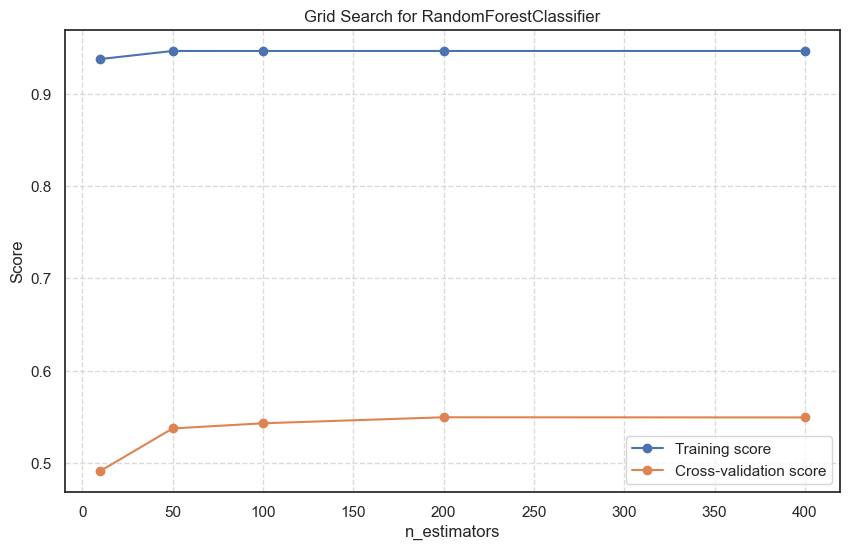

Best parameters: {'n_estimators': 200}
Best cross-validation score: 0.5495859418491011


In [707]:
# Define a range of hyperparameter values for n_estimators
param_grid = {'n_estimators': [10,50,100,200,400]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Random_Forest_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = grid_search.cv_results_
param_values = np.array(results['param_n_estimators'].data, dtype=int)
train_scores_mean = results['mean_train_score']
test_scores_mean = results['mean_test_score']

# Plot the scores over hyperparameter values
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores_mean, label='Training score', marker='o')
plt.plot(param_values, test_scores_mean, label='Cross-validation score', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Grid Search for RandomForestClassifier')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


# One vs Rest

In [698]:
# def one_vs_rest():
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Create a Support Vector Machine (SVM) classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=0)
# Wrap the classifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(svm_classifier)
# Train the model
ovr_classifier.fit(X_train, y_train)
y_train_pred = ovr_classifier.predict(X_train)
#  Make predictions
y_pred = ovr_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# Evaluate the model
ovr_accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train one vs rest accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test one vs rest accuracy score is {ovr_accuracy}')

train one vs rest accuracy score is 0.40996588693957114
test one vs rest accuracy score is 0.4114278752436647


# XG Boost

In [697]:
# def xg_boost():
import xgboost as xgb
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(X_train,y_train)
y_train_pred = xgc.predict(X_train)
y_pred = xgc.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)
xgboost_accuracy_score = accuracy_score(y_test, y_pred)
# return accuracy_score(y_train, y_train_pred).round(2), accuracy_score(y_test, y_pred).round(2)
print(f'train xgboost accuracy score is {accuracy_score(y_train, y_train_pred)}')
print(f'test xgboost accruacy score is {xgboost_accuracy_score}')

train xgboost accuracy score is 0.7935753736192332
test xgboost accruacy score is 0.5615253411306043


# All Model

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")
# model_accuracy_df = pd.DataFrame(columns=['Model','Train Accuracy', 'Test Accuracy'])
# model_accuracy_df.loc[len(model_accuracy_df)] =['Logistics_Regression', Logistics_Regression()[0], Logistics_Regression()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['Naive Bayes', Naive_Bayes()[0], Naive_Bayes()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['Ove vs Rest', one_vs_rest()[0], one_vs_rest()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['LDA', LDA()[0], LDA()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['QDA', QDA()[0], QDA()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['KNN', KNN()[0], KNN()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['SVM', SVM()[0], SVM()[1]]    
# model_accuracy_df.loc[len(model_accuracy_df)] = ['Non Linear SVM', Non_Linear_SVM()[0], Non_Linear_SVM()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['Decision Tree', decision_tree()[0], decision_tree()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['Random Forest', random_forest()[0], random_forest()[1]]
# model_accuracy_df.loc[len(model_accuracy_df)] = ['XG Boost', xg_boost()[0], xg_boost()[1]]
# model_accuracy_df

# Feature Selection using Lasso

In [508]:
# Create a Lasso Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=1000, random_state=42)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = lasso_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.4716
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1520
           1       0.39      0.37      0.38      1289
           2       0.34      0.27      0.30      1351
           3       0.43      0.38      0.40      1383
           4       0.52      0.55      0.54      1432
           5       0.53      0.66      0.59      1233

    accuracy                           0.47      8208
   macro avg       0.46      0.47      0.46      8208
weighted avg       0.46      0.47      0.46      8208



In [509]:
classification_encoded_df.columns[:24]

Index(['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'key_12', 'mode_1', 'mode_2',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [510]:
pd.DataFrame(feature_importances).T

0         1             2             3         4         5
0   0.000000  0.000000  1.987417e-02  5.645470e-02  0.040055  0.051392
1   0.017755  0.003457  4.386423e-04  7.068328e-02  0.083483  0.061928
2   0.019174  0.036827  3.674609e-02  4.104281e-03  0.000421  0.143543
3   0.024777  0.000724  4.101449e-03  1.500321e-02  0.002391  0.011679
4   0.000000  0.000000  1.934078e-02  3.613430e-02  0.002878  0.156449
5   0.029190  0.014455  1.183885e-02  5.250238e-03  0.026879  0.009509
6   0.018338  0.008622  4.849249e-03  1.790977e-02  0.000425  0.034940
7   0.020194  0.032691  0.000000e+00  2.080116e-07  0.008717  0.119802
8   0.000602  0.018623  1.882774e-02  1.338840e-02  0.033489  0.017082
9   0.048220  0.024886  3.852243e-04  2.890961e-02  0.041447  0.153361
10  0.019981  0.014836  1.117830e-02  1.574801e-04  0.056523  0.062077
11  0.004192  0.000000  5.329127e-07  1.107695e-02  0.000000  0.000000
12  0.041573  0.008494  2.250018e-02  4.167970e-02  0.026367  0.100516
13  0.041573  0.008494  2.250018e-02  4.167970e-02  0.026367  0.100516
14  0.397999  0.448352  1.283393e-01  1.239491e-02  0.551693  1.279362
15  0.549559  0.051442  1.217876e-01  7.460733e-01  0.360706  0.634447
16  0.181998  0.011850  4.622991e-02  1.138999e-01  0.000009  0.839253
17  0.045253  0.094670  3.424231e-01  3.619556e-01  0.884420  0.958161
18  0.251865  0.296232  1.419844e-02  9.297542e-02  0.004255  0.082379
19  0.494621  0.073127  8.979145e-03  3.745210e-01  0.203140  0.236018
20  0.094755  0.002326  7.377589e-02  7.296349e-04  0.088773  0.045047
21  0.674259  0.207701  2.673679e-02  2.066975e-01  0.242884  0.520174
22  0.202839  0.009095  1.565205e-02  1.653703e-01  0.040232  0.084953
23  0.064889  0.000015  4.033107e-02  3.777960e-01  0.008108  0.361022

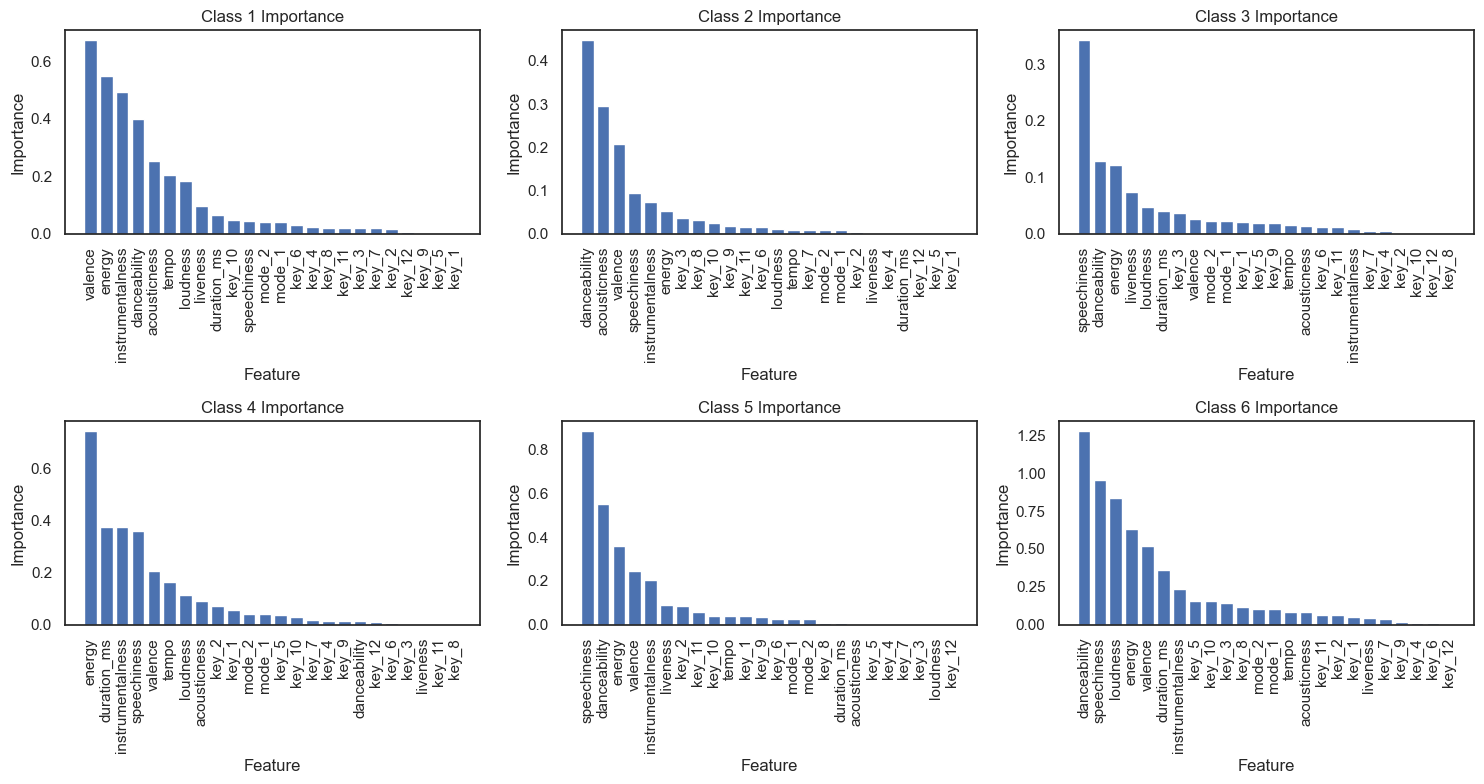

In [512]:
feature_importances = np.abs(lasso_model.coef_)

# Create separate DataFrames for each class
dfs = []
for class_idx in range(feature_importances.shape[0]):
    class_importance_df = pd.DataFrame({'Feature': classification_encoded_df.columns[:24], 'Importance': feature_importances[class_idx]})
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False)
    dfs.append(class_importance_df)

# Plot feature importances for each class
plt.figure(figsize=(15, 8))
for class_idx, class_importance_df in enumerate(dfs):
    plt.subplot(2, 3, class_idx + 1)  # Assumes 6 classes, adjust accordingly
    plt.bar(range(len(class_importance_df)), class_importance_df['Importance'], align='center')
    plt.xticks(range(len(class_importance_df)), class_importance_df['Feature'], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Class {class_idx + 1} Importance')

plt.tight_layout()
plt.show()

# Report

In [ ]:
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)

Accuracy: 0.4114278752436647
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.66      0.55      1520
           1       0.29      0.13      0.19      1289
           2       0.25      0.13      0.18      1351
           3       0.28      0.23      0.25      1383
           4       0.47      0.53      0.50      1432
           5       0.46      0.76      0.57      1233

    accuracy                           0.41      8208
   macro avg       0.37      0.41      0.37      8208
weighted avg       0.37      0.41      0.38      8208



# Artificial Neural Network Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create the neural network model
num_classes = len(np.unique(y_train))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with 11 features
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    # tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val_scaled, y_val))
history = model.fit(X_train, y_train, batch_size=64, epochs=10)


# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
385/385 [==============================] - 6s 8ms/step - loss: 1.4171 - accuracy: 0.4407
Epoch 2/10
385/385 [==============================] - 2s 6ms/step - loss: 1.2868 - accuracy: 0.5069
Epoch 3/10
385/385 [==============================] - 3s 7ms/step - loss: 1.2518 - accuracy: 0.5218
Epoch 4/10
385/385 [==============================] - 2s 6ms/step - loss: 1.2196 - accuracy: 0.5357
Epoch 5/10
385/385 [==============================] - 2s 6ms/step - loss: 1.2033 - accuracy: 0.5399
Epoch 6/10
385/385 [==============================] - 2s 6ms/step - loss: 1.1821 - accuracy: 0.5474
Epoch 7/10
385/385 [==============================] - 3s 8ms/step - loss: 1.1666 - accuracy: 0.5557
Epoch 8/10
385/385 [==============================] - 3s 9ms/step - loss: 1.1502 - accuracy: 0.5630
Epoch 9/10
385/385 [==============================] - 3s 9ms/step - loss: 1.1343 - accuracy: 0.5705
Epoch 10/10
257/257 [==============================] - 1s 3ms/step - loss: 1.2253 - accuracy: 0.5344

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
ANN_accuracy_score = accuracy_score(y_test, y_pred_classes)
ANN_accuracy_score

[[943  92 266  39 135  45]
 [ 99 502 218 143 259  68]
 [182 198 487 162 142 180]
 [ 43 192 154 557 337 100]
 [ 80 131  72 132 987  30]
 [ 73  41 167 137  35 780]]


0.5185185185185185

# Extra

In [ ]:
# Calculate precision for each class
# precision_per_class = precision_score(y_test, y_pred, average=None)
# print('Precision for each class:')
# for class_idx, precision in enumerate(precision_per_class):
#     print(f'Class {class_idx}: {precision:.2f}')

In [ ]:
# Calculate recall for each class
# recall_per_class = recall_score(y_test, y_pred, average=None)
# print('Recall (Sensitivity) for each class:')
# for class_idx, recall in enumerate(recall_per_class):
#     print(f'Class {class_idx}: {recall:.2f}')

In [ ]:
# Calculate specificity-like measure for each class
# specificity_per_class = []
# for class_idx in range(6):
#     other_classes = [c for c in range(6) if c != class_idx]
#     true_negatives = sum([cm[i, j] for i in other_classes for j in other_classes])
#     total_negatives = sum([cm[i, j] for i in other_classes for j in range(6)])
#     specificity = true_negatives / total_negatives
#     specificity_per_class.append(specificity)

# print('Specificity-like measure for each class:')
# for class_idx, specificity in enumerate(specificity_per_class):
#     print(f'Class {class_idx}: {specificity:.2f}')

In [ ]:
# # Calculate F1-score for each class
# f1_score_per_class = f1_score(y_test, y_pred, average=None)
# print('F1-Score for each class:')
# for class_idx, f1_score in enumerate(f1_score_per_class):
#     print(f'Class {class_idx}: {f1_score:.2f}')

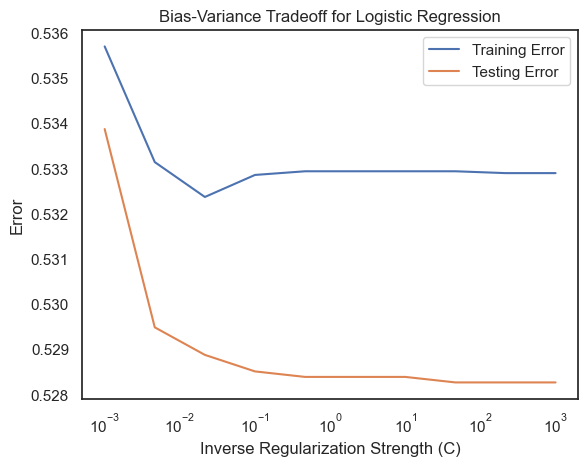

In [ ]:
# complexities = np.logspace(-3, 3, 10)
# train_errors, test_errors = [], []

# for C in complexities:
#     model = LogisticRegression(multi_class='auto', solver='lbfgs', C=C)
#     model.fit(X_train, y_train)
    
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     train_errors.append(1 - accuracy_score(y_train, y_train_pred))
#     test_errors.append(1 - accuracy_score(y_test, y_test_pred))

# # Step 6: Plot Bias vs. Variance
# plt.plot(complexities, train_errors, label='Training Error')
# plt.plot(complexities, test_errors, label='Testing Error')
# plt.xscale('log')  # Using a log scale for better visualization
# plt.xlabel('Inverse Regularization Strength (C)')
# plt.ylabel('Error')
# plt.title('Bias-Variance Tradeoff for Logistic Regression')
# plt.legend()
# plt.show()


In [ ]:
# log loss

In [ ]:
# Balanced Accuracy

### Visualising the Training set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

### Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

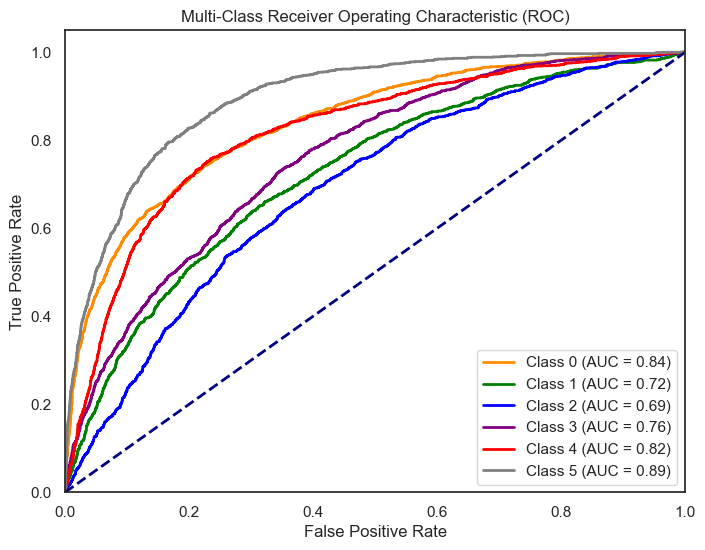

In [ ]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize

# # One-hot encode the labels
# y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3,4,5])
# y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3,4,5])

# # Create and train a logistic regression model
# model = LogisticRegression(multi_class='ovr')  # One-vs-Rest strategy
# model.fit(X_train, y_train)

# # Predict probabilities for all classes
# y_probs = model.predict_proba(X_test)

# # Calculate ROC curve for each class
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(6):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot the ROC curves for each class
# plt.figure(figsize=(8, 6))
# colors = ['darkorange', 'green', 'blue', 'purple','red', 'grey']
# for i, color in zip(range(6), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()



In [ ]:
import shap

# Initialize the SHAP explainer with the model and training data
explainer = shap.Explainer(Logistics_classifier, X_train)

# Calculate SHAP values for a specific instance (replace with your desired instance)
sample_instance = X_test
shap_values = explainer.shap_values(sample_instance)

# Summary plot
shap.summary_plot(shap_values, X_test)

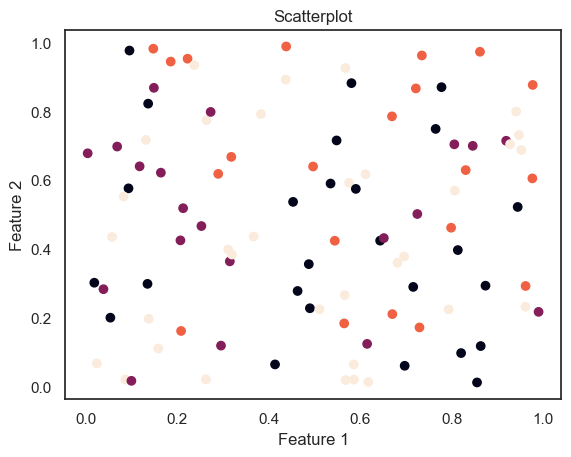

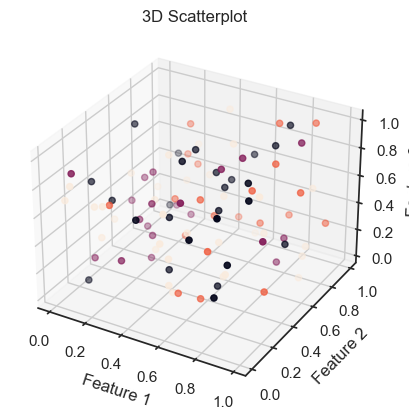

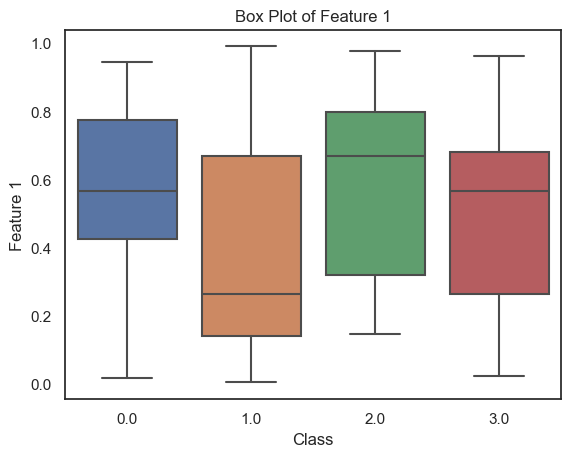

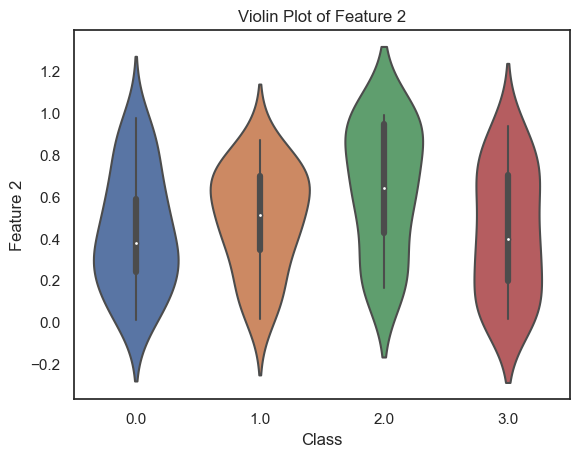

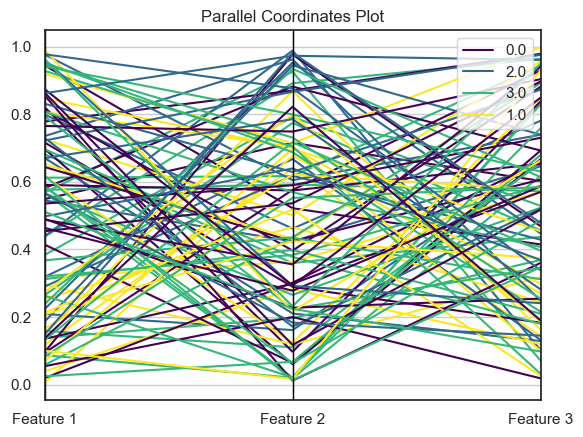

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sample data
np.random.seed(0)
data = np.random.rand(100, 3)
classes = np.random.randint(4, size=100)

# Creating a DataFrame
data_with_classes = np.column_stack((data, classes))
df = pd.DataFrame(data_with_classes, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Class'])

# Scatterplot
plt.scatter(data[:, 0], data[:, 1], c=classes)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=classes)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatterplot')
plt.show()

# Box Plots
sns.boxplot(x='Class', y='Feature 1', data=df)
plt.title('Box Plot of Feature 1')
plt.show()

# Violin Plots
sns.violinplot(x='Class', y='Feature 2', data=df)
plt.title('Violin Plot of Feature 2')
plt.show()

# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# # 3D Density Plot (using Plotly)
# import plotly.express as px
# fig = px.density_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Class')
# fig.update_layout(title='3D Density Plot')
# fig.show()


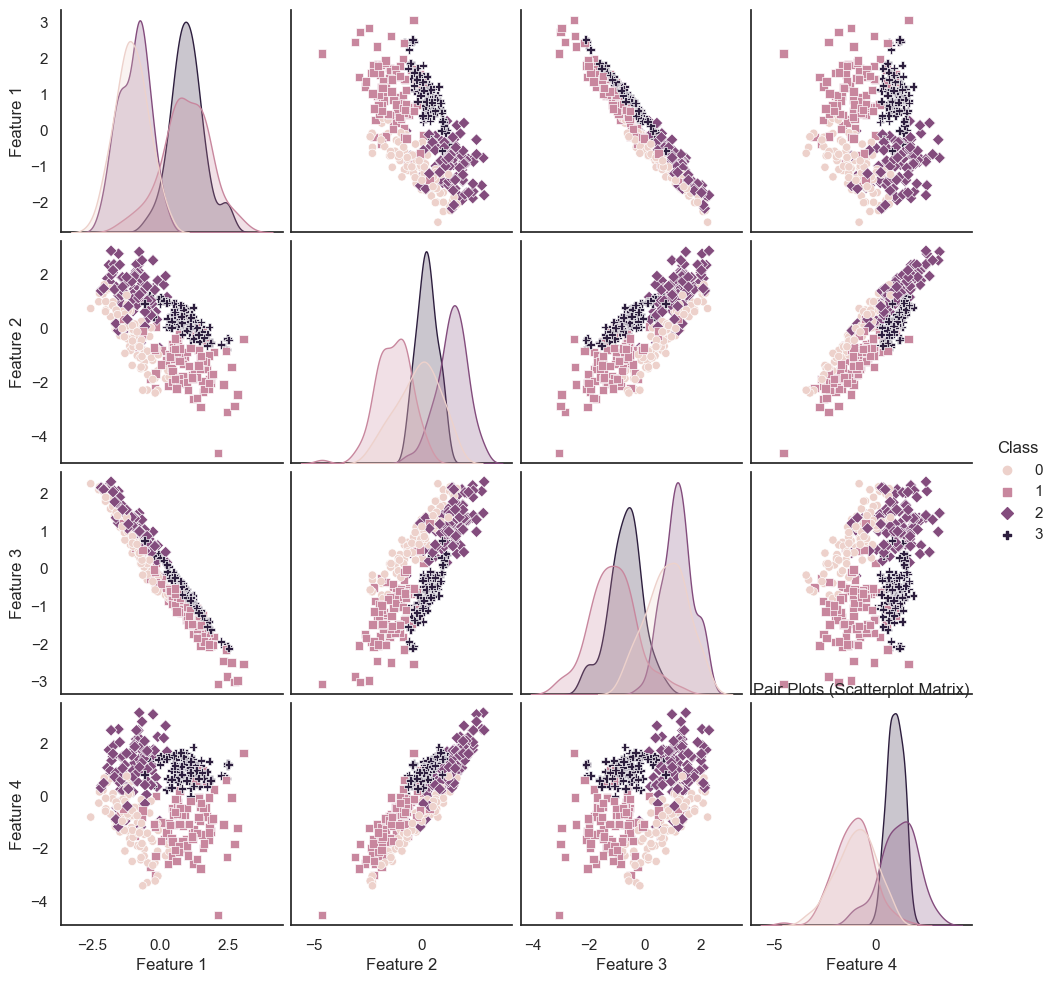

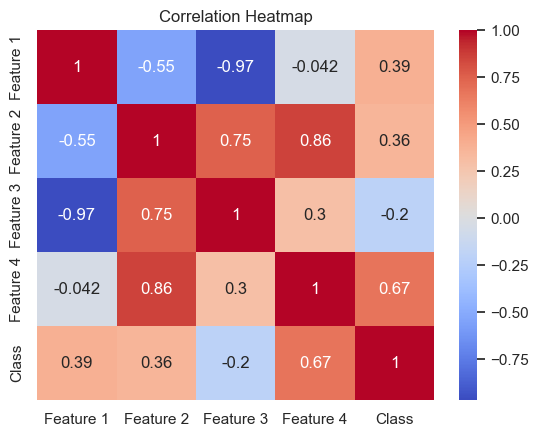

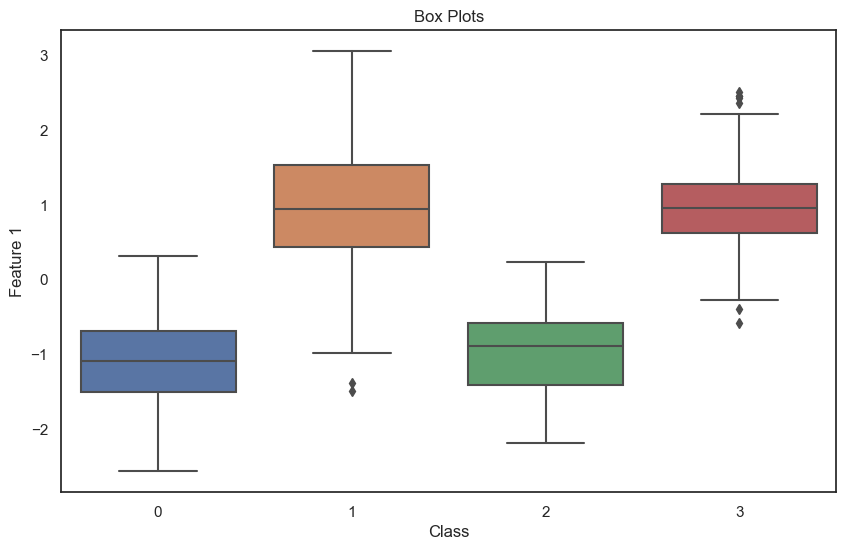

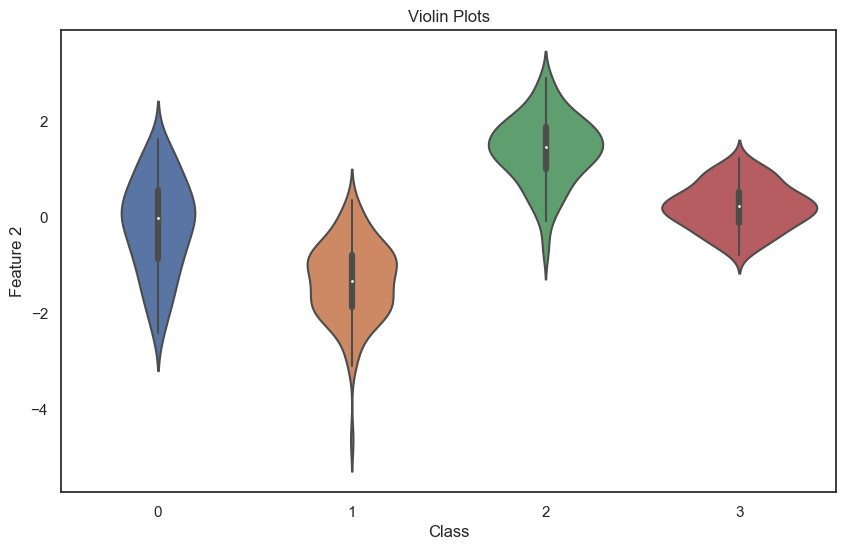

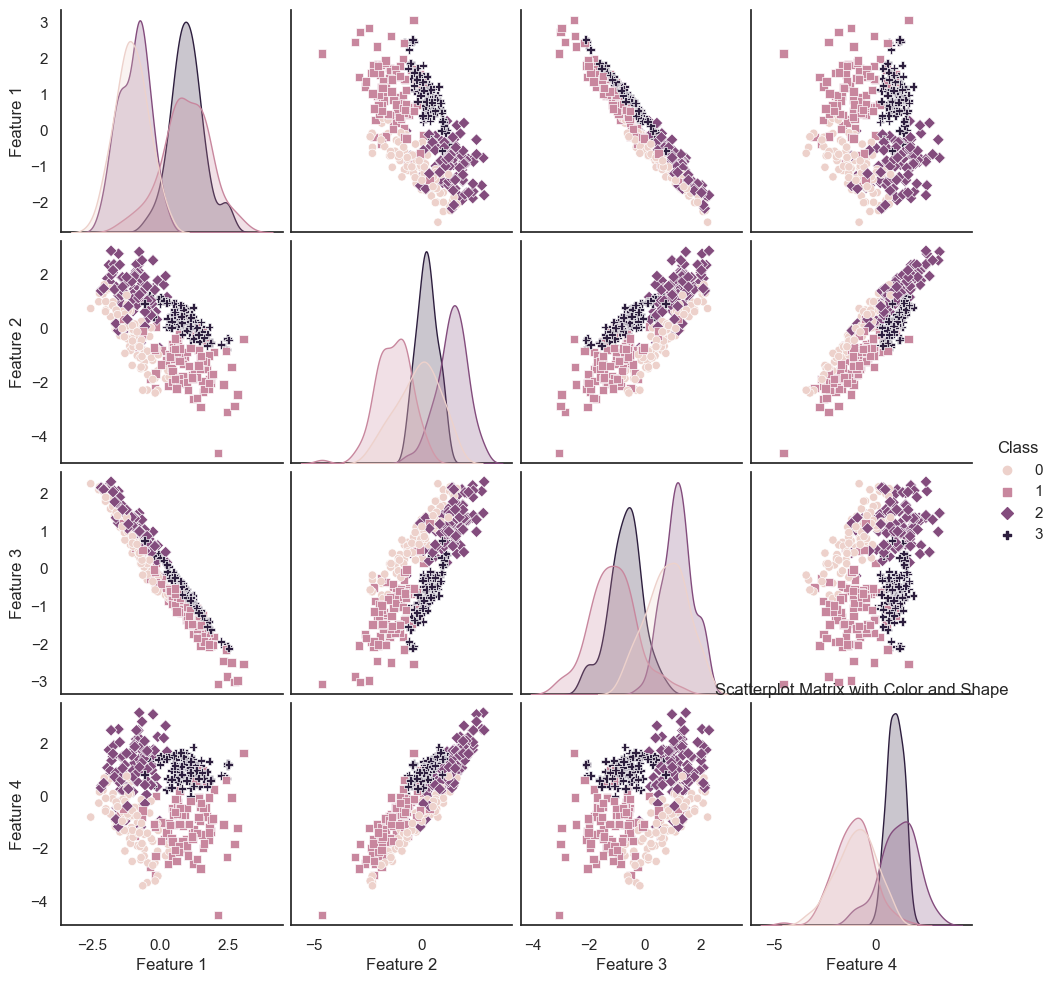

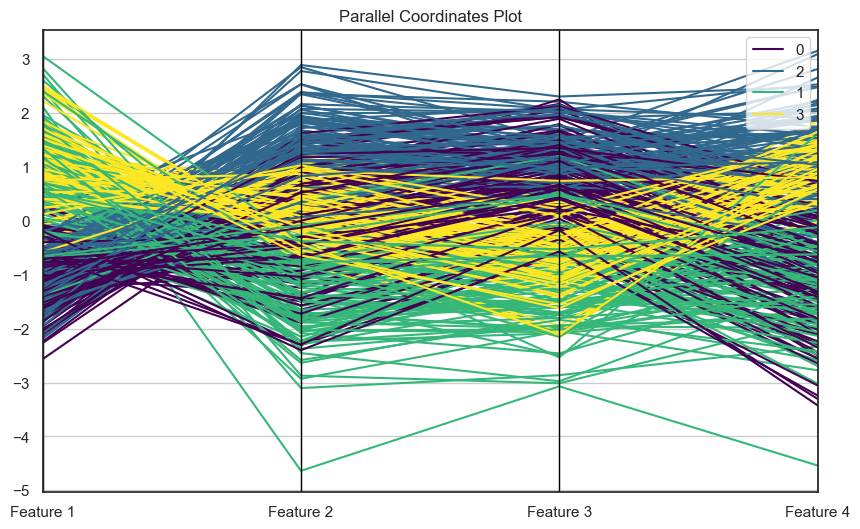

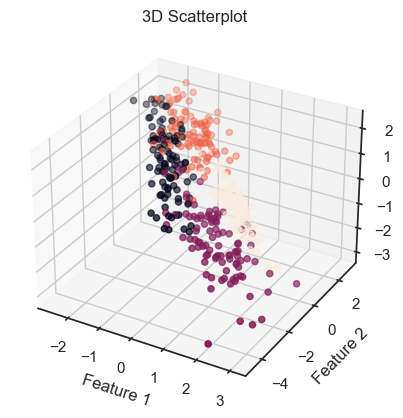

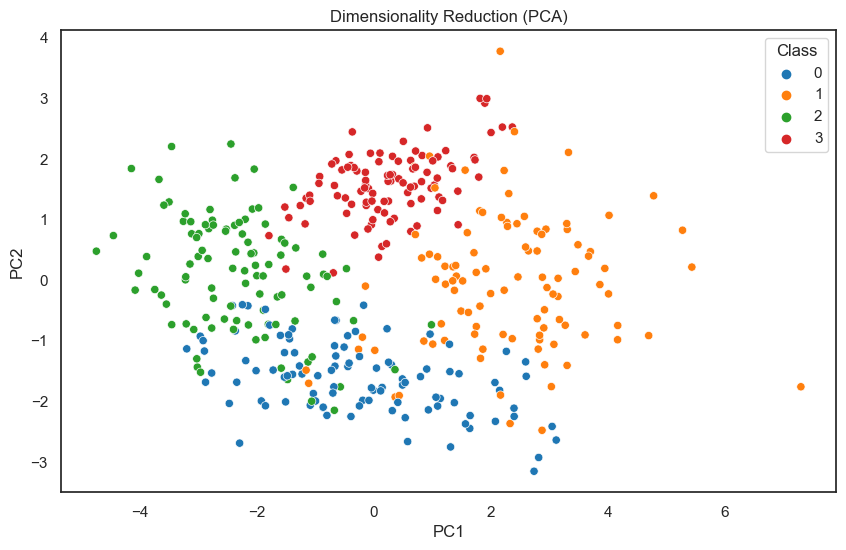

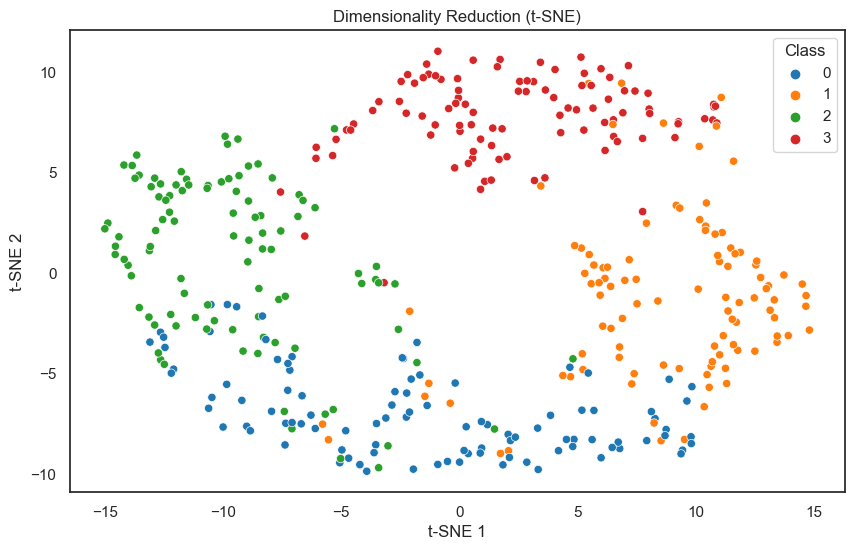

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=4, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Feature 1'], df['Feature 2'], df['Feature 3'], c=df['Class'], marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatterplot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


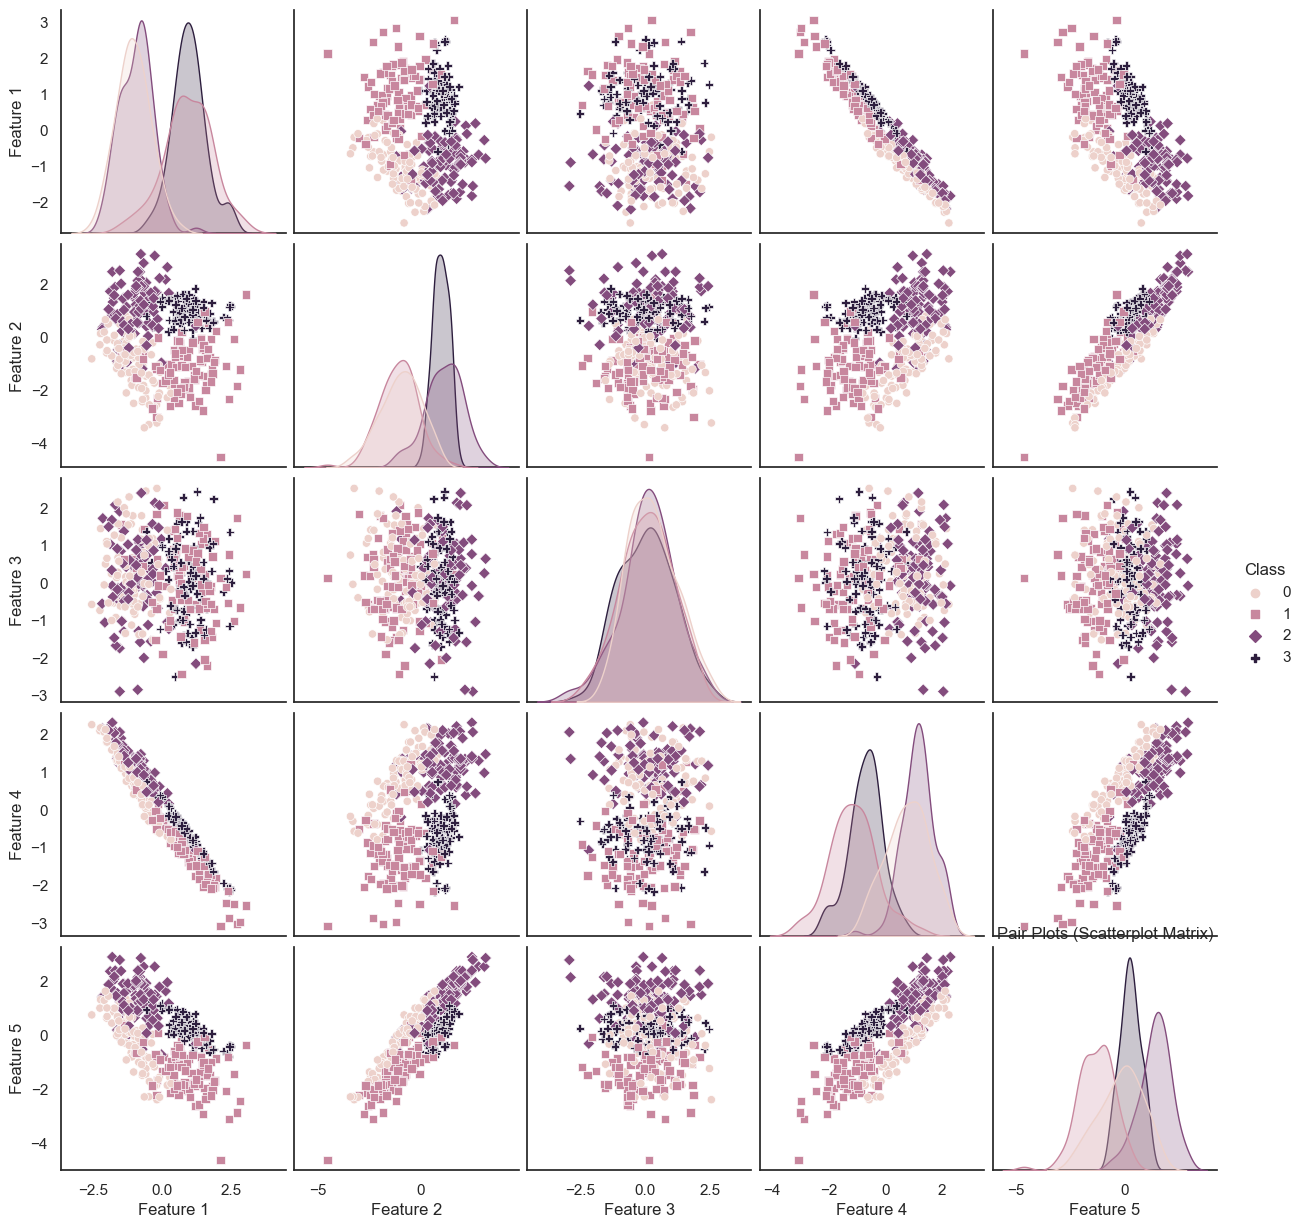

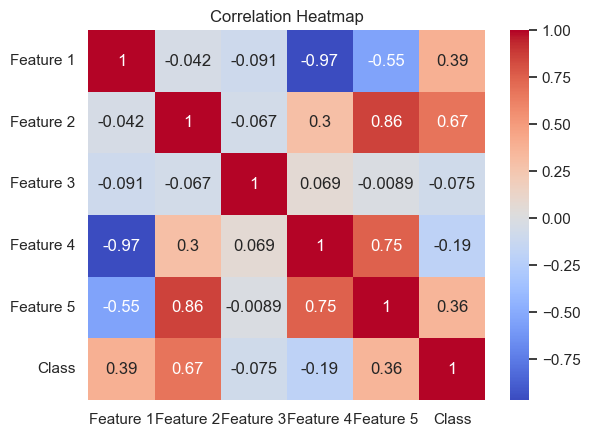

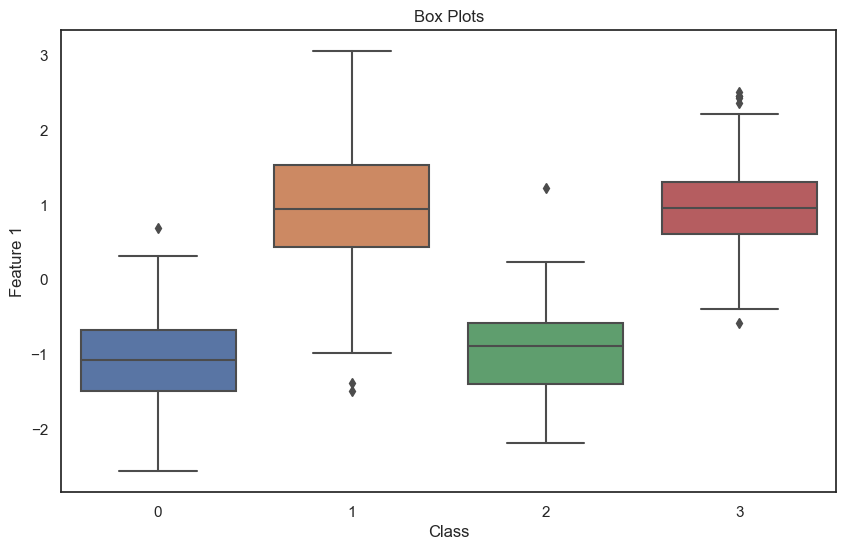

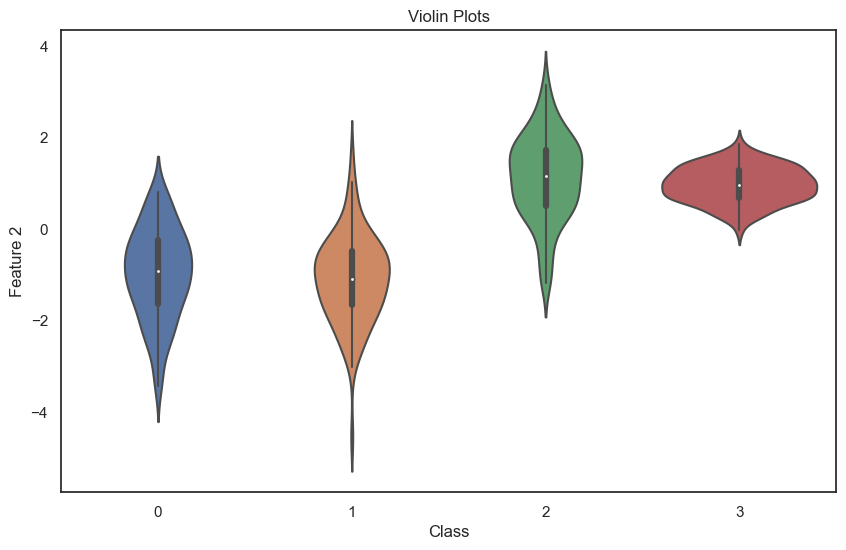

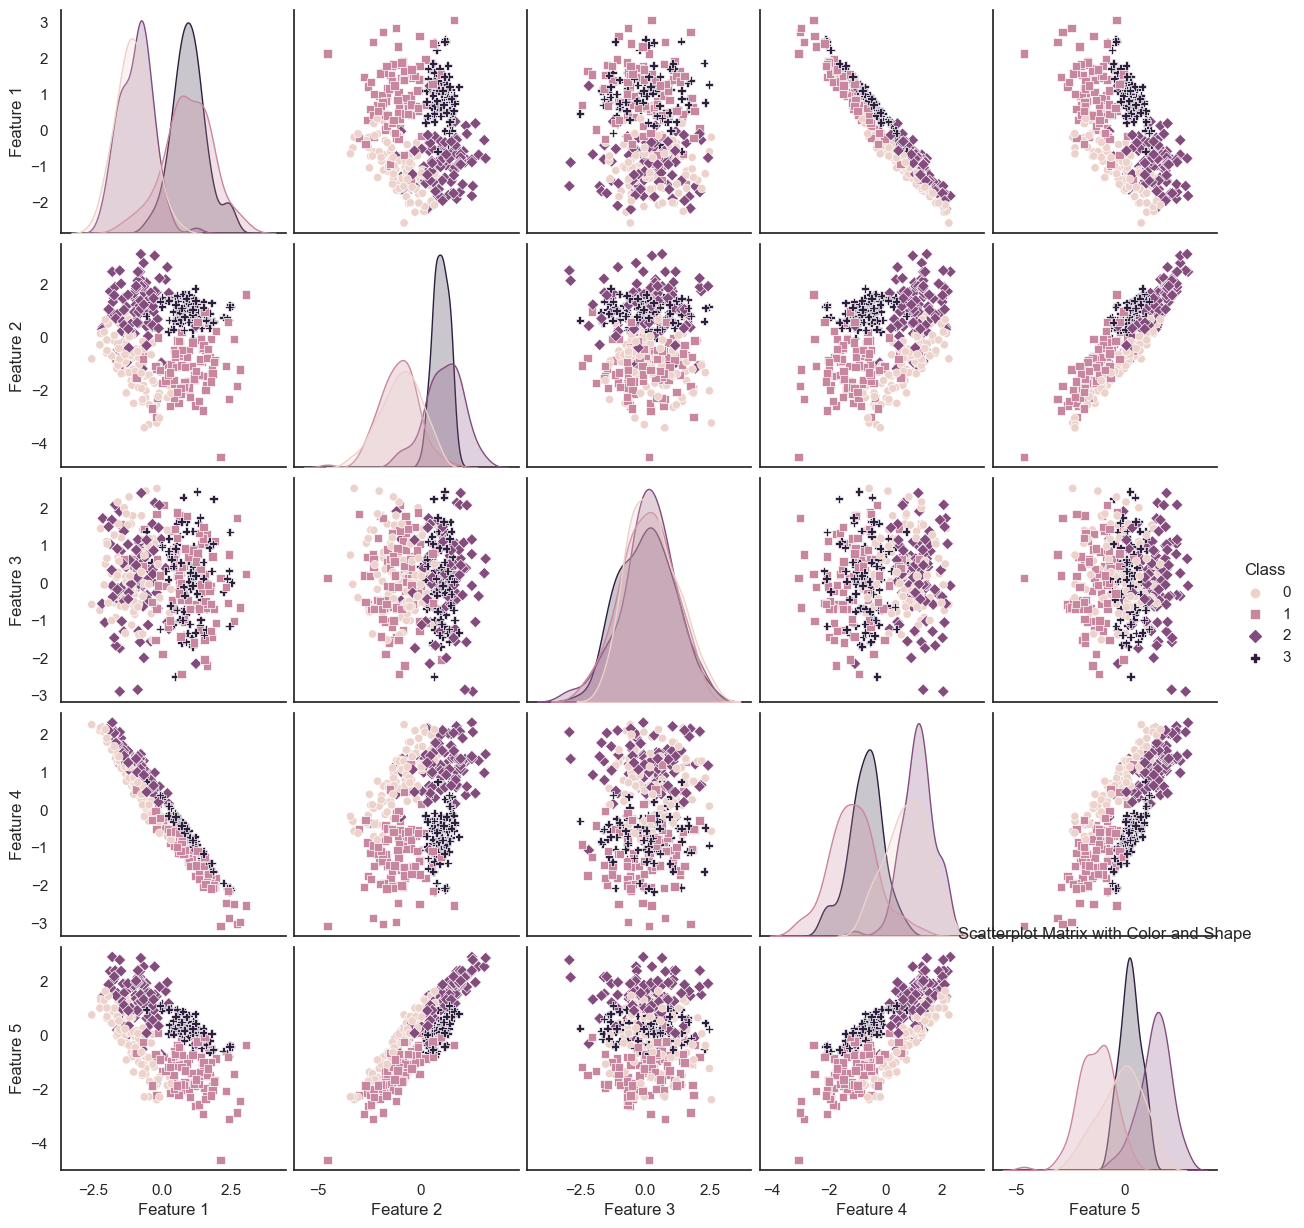

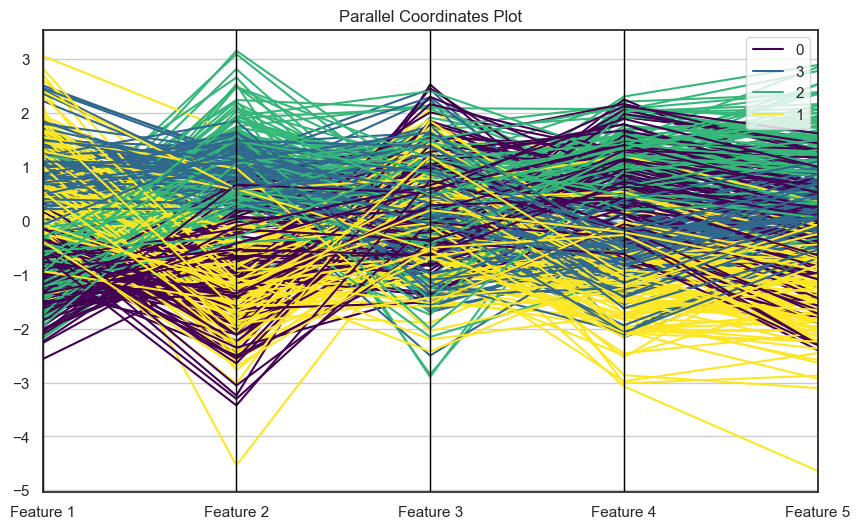

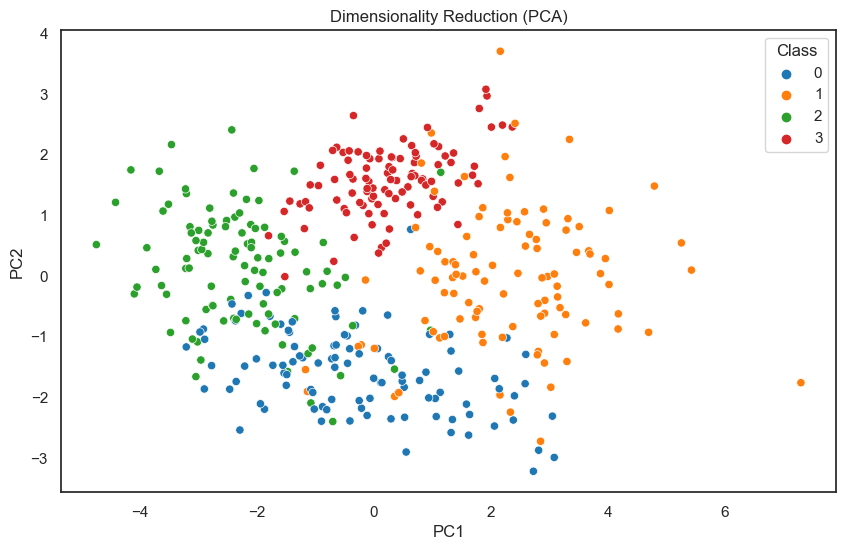

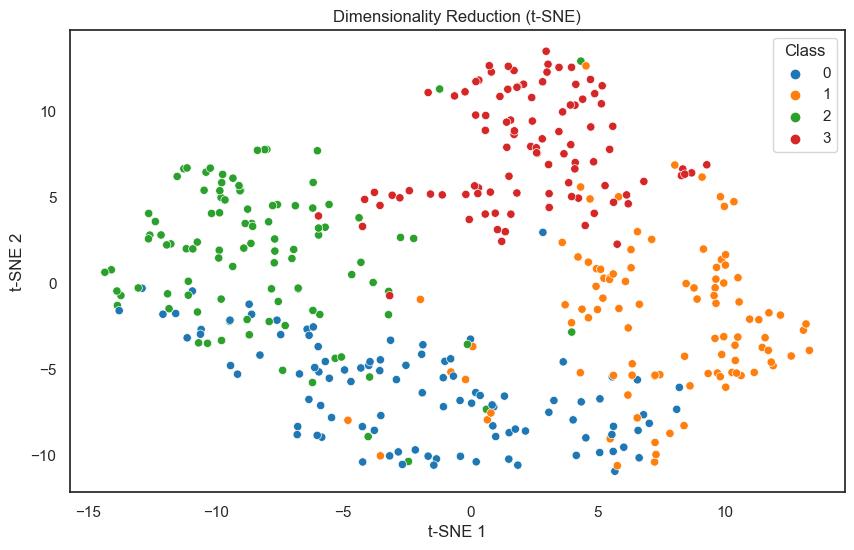

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=5, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
df['Class'] = y

# Pair Plots (Scatterplot Matrix)
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Pair Plots (Scatterplot Matrix)')
plt.show()

# Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Feature 1')
plt.title('Box Plots')
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Class', y='Feature 2')
plt.title('Violin Plots')
plt.show()

# Scatterplot Matrix with Color and Shape
sns.pairplot(df, hue='Class', markers=["o", "s", "D", "P"])
plt.title('Scatterplot Matrix with Color and Shape')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (PCA)')
plt.show()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Class'] = y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='t-SNE 1', y='t-SNE 2', hue='Class', palette='tab10')
plt.title('Dimensionality Reduction (t-SNE)')
plt.show()


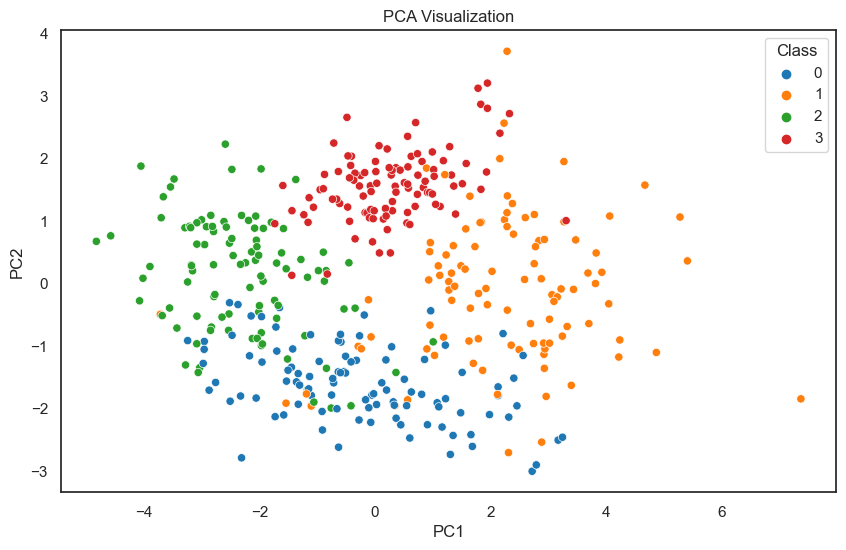

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Scatterplot of PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('PCA Visualization')
plt.show()


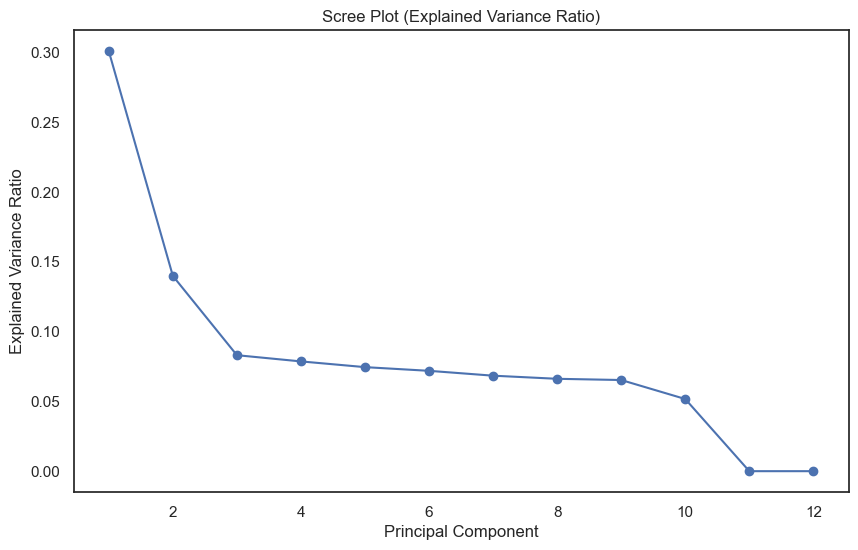

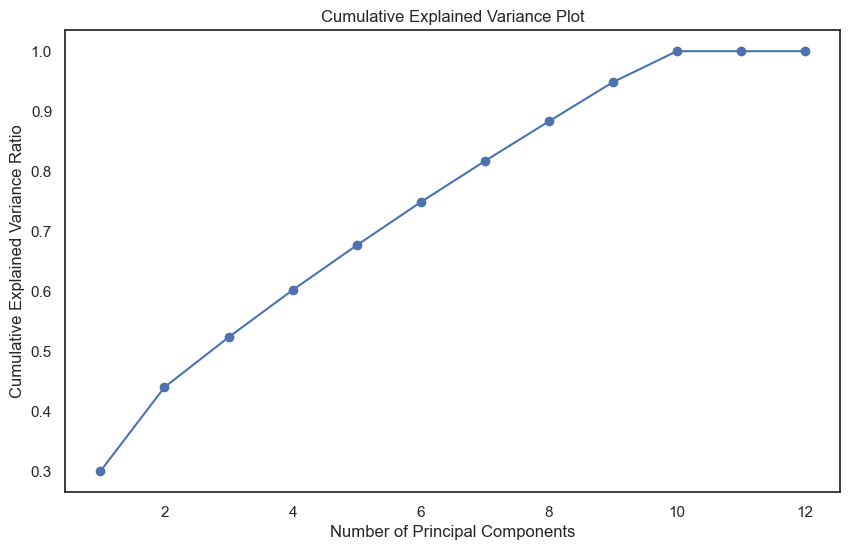

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data
X, y = make_classification(n_samples=400, n_features=12, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
feature_names = [f'Feature {i+1}' for i in range(12)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Dimensionality Reduction (PCA)
pca = PCA(n_components=12)
pca_result = pca.fit_transform(X)
explained_var_ratio = pca.explained_variance_ratio_

# Scree Plot (explained variance ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), explained_var_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.show()

# Cumulative Explained Variance Plot
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()
